<a href="https://colab.research.google.com/github/Renad-CAI/Lab2_Exam_T5/blob/main/Lab_Exam_Week2_Weekly_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Weekly Project 2!

## Introduction to Road Traffic Accidents (RTA) Dataset

### Dataset Overview
The RTA Dataset provides a detailed snapshot of road traffic accidents, capturing a range of data from accident conditions to casualty details. This dataset is essential for analyzing patterns and causes of accidents to improve road safety.

### Data Characteristics
- **Entries**: The dataset contains 12,316 entries.
- **Features**: There are 32 features in the dataset, which include:
  - `Time`: Time when the accident occurred.
  - `Day_of_week`: Day of the week.
  - `Age_band_of_driver`: Age group of the driver involved.
  - `Sex_of_driver`: Gender of the driver.
  - `Educational_level`: Educational level of the driver.
  - `Type_of_vehicle`: Type of vehicle involved in the accident.
  - `Cause_of_accident`: Reported cause of the accident.
  - `Accident_severity`: Severity of the accident.
- **Target Column**: `Accident_severity` is used as the target column for modeling. This feature classifies the severity of each accident.

### Objective
Students will use this dataset to apply various data visualization, modeling, and evaluation techniques learned in class. The primary goal is to build models that can accurately predict the severity of accidents and to identify the key factors that contribute to severe accidents.

## Import Libraries
Import all the necessary libraries here. Include libraries for handling data (like pandas), visualization (like matplotlib and seaborn), and modeling (like scikit-learn).

In [3186]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn

## Load Data
Load the dataset from the provided CSV file into a DataFrame.

In [3187]:
df = pd.read_csv('/content/RTA_Dataset.csv')

## Exploratory Data Analysis (EDA)
Perform EDA to understand the data better. This involves several steps to summarize the main characteristics, uncover patterns, and establish relationships:
* Find the dataset information and observe the datatypes.
* Check the shape of the data to understand its structure.
* View the the data with various functions to get an initial sense of the data.
* Perform summary statistics on the dataset to grasp central tendencies and variability.
* Check for duplicated data.
* Check for null values.

And apply more if needed!


In [3188]:
df.head()

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,...,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity
0,17:02:00,Monday,18-30,Male,Above high school,Employee,1-2yr,Automobile,Owner,Above 10yr,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Moving Backward,Slight Injury
1,17:02:00,Monday,31-50,Male,Junior high school,Employee,Above 10yr,Public (> 45 seats),Owner,5-10yrs,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury
2,17:02:00,Monday,18-30,Male,Junior high school,Employee,1-2yr,Lorry (41?100Q),Owner,NaN,...,Going straight,Driver or rider,Male,31-50,3,Driver,NaN,Not a Pedestrian,Changing lane to the left,Serious Injury
3,1:06:00,Sunday,18-30,Male,Junior high school,Employee,5-10yr,Public (> 45 seats),Governmental,NaN,...,Going straight,Pedestrian,Female,18-30,3,Driver,Normal,Not a Pedestrian,Changing lane to the right,Slight Injury
4,1:06:00,Sunday,18-30,Male,Junior high school,Employee,2-5yr,NaN,Owner,5-10yrs,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury


In [3189]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12316 entries, 0 to 12315
Data columns (total 32 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Time                         12316 non-null  object
 1   Day_of_week                  12316 non-null  object
 2   Age_band_of_driver           12316 non-null  object
 3   Sex_of_driver                12316 non-null  object
 4   Educational_level            11575 non-null  object
 5   Vehicle_driver_relation      11737 non-null  object
 6   Driving_experience           11487 non-null  object
 7   Type_of_vehicle              11366 non-null  object
 8   Owner_of_vehicle             11834 non-null  object
 9   Service_year_of_vehicle      8388 non-null   object
 10  Defect_of_vehicle            7889 non-null   object
 11  Area_accident_occured        12077 non-null  object
 12  Lanes_or_Medians             11931 non-null  object
 13  Road_allignment              12

In [3190]:
df.describe()

,Number_of_vehicles_involved,Number_of_casualties
count,12316.000000,12316.000000
mean,2.040679,1.548149
std,0.688790,1.007179
min,1.000000,1.000000
25%,2.000000,1.000000
50%,2.000000,1.000000
75%,2.000000,2.000000
max,7.000000,8.000000


In [3191]:
df.sample(5)

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,...,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity
10190,18:40:00,Friday,18-30,Male,Above high school,Employee,1-2yr,Automobile,Owner,1-2yr,...,Moving Backward,Passenger,Female,31-50,3,Driver,Normal,Not a Pedestrian,Changing lane to the left,Slight Injury
2022,7:46:00,Friday,31-50,Male,Elementary school,Owner,2-5yr,Lorry (41?100Q),Owner,2-5yrs,...,Going straight,Pedestrian,Female,Under 18,3,Driver,Normal,Not a Pedestrian,Driving carelessly,Slight Injury
3220,23:20:00,Monday,Unknown,Female,Junior high school,Employee,Above 10yr,Other,Owner,2-5yrs,...,Moving Backward,Driver or rider,Male,Under 18,2,NaN,NaN,Not a Pedestrian,No distancing,Slight Injury
10237,21:15:00,Thursday,18-30,Male,NaN,NaN,NaN,Public (12 seats),Owner,Unknown,...,Going straight,Pedestrian,Male,Over 51,3,Driver,Normal,Crossing from nearside - masked by parked or s...,No distancing,Fatal injury
10005,17:10:00,Friday,18-30,Male,Junior high school,Employee,Below 1yr,Lorry (41?100Q),Owner,Unknown,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,No distancing,Slight Injury


In [3192]:
df.dtypes

,0
Time,object
Day_of_week,object
Age_band_of_driver,object
Sex_of_driver,object
Educational_level,object
Vehicle_driver_relation,object
Driving_experience,object
Type_of_vehicle,object
Owner_of_vehicle,object
Service_year_of_vehicle,object


In [3193]:
df.shape

(12316, 32)

In [3194]:
df.duplicated().sum()

0

In [3195]:
df.isnull().sum()

,0
Time,0
Day_of_week,0
Age_band_of_driver,0
Sex_of_driver,0
Educational_level,741
Vehicle_driver_relation,579
Driving_experience,829
Type_of_vehicle,950
Owner_of_vehicle,482
Service_year_of_vehicle,3928


## Data Preprocessing
Data preprocessing is essential for transforming raw data into a format suitable for further analysis and modeling. Follow these steps to ensure your data is ready for predictive modeling or advanced analytics:
- **Handling Missing Values**: Replace missing values with appropriate statistics (mean, median, mode) or use more complex imputation techniques.
- **Normalization/Scaling**: Scale data to a small, specified range like 0 to 1, or transform it to have a mean of zero and a standard deviation of one.
- **Label Encoding**: Convert categorical text data into model-understandable numbers where the labels are ordered.
- **One-Hot Encoding**: Use for nominal categorical data where no ordinal relationship exists to transform the data into a binary column for each category. (Be careful not to increase the dimensionality significantly)
- **Detection and Treatment of Outliers**: Use statistical tests, box plots, or scatter plots to identify outliers and then cap, trim, or use robust methods to reduce the effect of outliers, depending on the context.
- **Feature Engineering**: Enhance your dataset by creating new features and transforming existing ones. This might involve combining data from different columns, applying transformations, or reducing dimensionality with techniques like PCA to improve model performance.

Consider these steps as a foundation, and feel free to introduce additional preprocessing techniques as needed to address specific characteristics of your dataset.

In [3196]:
df['Educational_level'].unique()

array(['Above high school', 'Junior high school', nan,
       'Elementary school', 'High school', 'Unknown', 'Illiterate',
       'Writing & reading'], dtype=object)

In [3197]:
df['Educational_level'] = df['Educational_level'].replace("Unknown", np.nan)

In [3198]:
df['Educational_level'] = df['Educational_level'].fillna('Unknown')

In [3199]:
df['Vehicle_driver_relation'].unique()

array(['Employee', 'Unknown', 'Owner', nan, 'Other'], dtype=object)

In [3200]:
df['Vehicle_driver_relation'] = df['Vehicle_driver_relation'].replace("Unknown", np.nan)

In [3201]:
df['Vehicle_driver_relation'] = df['Vehicle_driver_relation'].replace("Other", np.nan)

In [3202]:
df['Vehicle_driver_relation'] = df['Vehicle_driver_relation'].fillna('Unknown')

In [3203]:
df['Driving_experience'].unique()

array(['1-2yr', 'Above 10yr', '5-10yr', '2-5yr', nan, 'No Licence',
       'Below 1yr', 'unknown'], dtype=object)

In [3204]:
df['Driving_experience'] = df['Driving_experience'].replace("unknown", np.nan)

In [3205]:
df['Driving_experience'] = df['Driving_experience'].fillna(method= 'bfill')

<ipython-input-3205-3b0330bd6169>:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['Driving_experience'] = df['Driving_experience'].fillna(method= 'bfill')


In [3206]:
df['Type_of_vehicle'].unique()

array(['Automobile', 'Public (> 45 seats)', 'Lorry (41?100Q)', nan,
       'Public (13?45 seats)', 'Lorry (11?40Q)', 'Long lorry',
       'Public (12 seats)', 'Taxi', 'Pick up upto 10Q', 'Stationwagen',
       'Ridden horse', 'Other', 'Bajaj', 'Turbo', 'Motorcycle',
       'Special vehicle', 'Bicycle'], dtype=object)

In [3207]:
df['Type_of_vehicle'] = df['Type_of_vehicle'].replace("Other", np.nan)

In [3208]:
df['Type_of_vehicle'] = df['Type_of_vehicle'].fillna('Unknown')

In [3209]:
df['Owner_of_vehicle'].unique()

array(['Owner', 'Governmental', nan, 'Organization', 'Other'],
      dtype=object)

In [3210]:
df['Owner_of_vehicle'] = df['Owner_of_vehicle'].replace("Other", np.nan)

In [3211]:
df['Owner_of_vehicle'] = df['Owner_of_vehicle'].fillna(df['Owner_of_vehicle'].mode()[0])

In [3212]:
df['Service_year_of_vehicle'].unique()

array(['Above 10yr', '5-10yrs', nan, '1-2yr', '2-5yrs', 'Unknown',
       'Below 1yr'], dtype=object)

In [3213]:
df['Service_year_of_vehicle'] = df['Service_year_of_vehicle'].fillna('Unknown')

In [3214]:
df['Defect_of_vehicle'].unique()

array(['No defect', nan, '7', '5'], dtype=object)

In [3215]:
df['Defect_of_vehicle'] = df['Defect_of_vehicle'].fillna(df['Defect_of_vehicle'].mode()[0])

In [3216]:
df['Area_accident_occured'].unique()

array(['Residential areas', 'Office areas', '  Recreational areas',
       ' Industrial areas', nan, 'Other', ' Church areas',
       '  Market areas', 'Unknown', 'Rural village areas',
       ' Outside rural areas', ' Hospital areas', 'School areas',
       'Rural village areasOffice areas', 'Recreational areas'],
      dtype=object)

In [3217]:
df['Area_accident_occured'] = df['Area_accident_occured'].replace("Other", np.nan)

In [3218]:
df['Area_accident_occured'] = df['Area_accident_occured'].replace("Unknown", np.nan)

In [3219]:
df['Area_accident_occured'] = df['Area_accident_occured'].fillna(df['Area_accident_occured'].mode()[0])

In [3220]:
df['Lanes_or_Medians'].unique()

array([nan, 'Undivided Two way', 'other', 'Double carriageway (median)',
       'One way', 'Two-way (divided with solid lines road marking)',
       'Two-way (divided with broken lines road marking)', 'Unknown'],
      dtype=object)

In [3221]:
df['Lanes_or_Medians'] = df['Lanes_or_Medians'].replace("other", np.nan)

In [3222]:
df['Lanes_or_Medians'] = df['Lanes_or_Medians'].replace("Unknown", np.nan)

In [3223]:
df['Lanes_or_Medians'] = df['Lanes_or_Medians'].fillna(df['Lanes_or_Medians'].mode()[0])

In [3224]:
df['Road_allignment'] = df['Road_allignment'].dropna()

In [3225]:
df['Types_of_Junction'].unique()

array(['No junction', 'Y Shape', 'Crossing', 'O Shape', 'Other',
       'Unknown', 'T Shape', 'X Shape', nan], dtype=object)

In [3226]:
df['Types_of_Junction'] = df['Types_of_Junction'].replace("Other", np.nan)

In [3227]:
df['Types_of_Junction'] = df['Types_of_Junction'].replace("Unknown", np.nan)

In [3228]:
df['Types_of_Junction'] = df['Types_of_Junction'].fillna(df['Types_of_Junction'].mode()[0])

In [3229]:
df['Road_surface_type'] = df['Road_surface_type'].dropna()

In [3230]:
df['Type_of_collision'].unique()

array(['Collision with roadside-parked vehicles',
       'Vehicle with vehicle collision',
       'Collision with roadside objects', 'Collision with animals',
       'Other', 'Rollover', 'Fall from vehicles',
       'Collision with pedestrians', 'With Train', 'Unknown', nan],
      dtype=object)

In [3231]:
df['Type_of_collision'] = df['Type_of_collision'].replace("Other", np.nan)

In [3232]:
df['Type_of_collision'] = df['Type_of_collision'].replace("Unknown", np.nan)

In [3233]:
df['Type_of_collision'] = df['Type_of_collision'].fillna(method = 'bfill')

<ipython-input-3233-6081c83ff08e>:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['Type_of_collision'] = df['Type_of_collision'].fillna(method = 'bfill')


In [3234]:
df['Vehicle_movement'].unique()

array(['Going straight', 'U-Turn', 'Moving Backward', 'Turnover',
       'Waiting to go', 'Getting off', 'Reversing', 'Unknown', 'Parked',
       'Stopping', 'Overtaking', 'Other', 'Entering a junction', nan],
      dtype=object)

In [3235]:
df['Vehicle_movement'] = df['Vehicle_movement'].replace("Unknown", np.nan)

In [3236]:
df['Vehicle_movement'] = df['Vehicle_movement'].replace("Other", np.nan)

In [3237]:
df['Vehicle_movement'] = df['Vehicle_movement'].fillna(method= 'ffill')

<ipython-input-3237-ae29743d57e0>:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['Vehicle_movement'] = df['Vehicle_movement'].fillna(method= 'ffill')


In [3238]:
df['Work_of_casuality'].unique()

array([nan, 'Driver', 'Other', 'Unemployed', 'Employee', 'Self-employed',
       'Student', 'Unknown'], dtype=object)

In [3239]:
df['Work_of_casuality'] = df['Work_of_casuality'].replace("Other", np.nan)

In [3240]:
df['Work_of_casuality'] = df['Work_of_casuality'].replace("Unknown", np.nan)

In [3241]:
df['Work_of_casuality'] = df['Work_of_casuality'].fillna(df['Work_of_casuality'].mode()[0])

In [3242]:
df['Fitness_of_casuality'].unique()

array([nan, 'Normal', 'Deaf', 'Other', 'Blind', 'NormalNormal'],
      dtype=object)

In [3243]:
df['Fitness_of_casuality'] = df['Fitness_of_casuality'].replace("Other", np.nan)

In [3244]:
df['Fitness_of_casuality'] = df['Fitness_of_casuality'].fillna(method = 'bfill')

<ipython-input-3244-f0063da13056>:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['Fitness_of_casuality'] = df['Fitness_of_casuality'].fillna(method = 'bfill')


In [3245]:
df.isnull().sum()

,0
Time,0
Day_of_week,0
Age_band_of_driver,0
Sex_of_driver,0
Educational_level,0
Vehicle_driver_relation,0
Driving_experience,0
Type_of_vehicle,0
Owner_of_vehicle,0
Service_year_of_vehicle,0


In [3246]:
#-------------------------------------------------------

In [3247]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12316 entries, 0 to 12315
Data columns (total 32 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Time                         12316 non-null  object
 1   Day_of_week                  12316 non-null  object
 2   Age_band_of_driver           12316 non-null  object
 3   Sex_of_driver                12316 non-null  object
 4   Educational_level            12316 non-null  object
 5   Vehicle_driver_relation      12316 non-null  object
 6   Driving_experience           12316 non-null  object
 7   Type_of_vehicle              12316 non-null  object
 8   Owner_of_vehicle             12316 non-null  object
 9   Service_year_of_vehicle      12316 non-null  object
 10  Defect_of_vehicle            12316 non-null  object
 11  Area_accident_occured        12316 non-null  object
 12  Lanes_or_Medians             12316 non-null  object
 13  Road_allignment              12

In [3248]:
df.sample(5)

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,...,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity
231,7:58:00,Thursday,Under 18,Male,Junior high school,Employee,2-5yr,Taxi,Owner,Unknown,...,Going straight,Pedestrian,Male,18-30,2,Driver,Normal,Unknown or other,Getting off the vehicle improperly,Slight Injury
8450,9:00:00,Wednesday,18-30,Male,Junior high school,Employee,5-10yr,Automobile,Owner,Unknown,...,Going straight,Driver or rider,Male,Over 51,3,Driver,Normal,Not a Pedestrian,Driving carelessly,Slight Injury
9192,12:20:00,Saturday,18-30,Male,Unknown,Unknown,2-5yr,Stationwagen,Owner,5-10yrs,...,Going straight,Pedestrian,Male,5,3,Driver,Normal,Crossing from driver's nearside,Driving carelessly,Slight Injury
6539,16:20:00,Wednesday,Unknown,Female,Elementary school,Employee,Below 1yr,Stationwagen,Governmental,Below 1yr,...,Going straight,Driver or rider,Male,31-50,3,Employee,Normal,Not a Pedestrian,No priority to vehicle,Slight Injury
5234,13:34:00,Friday,31-50,Male,Junior high school,Employee,5-10yr,Lorry (41?100Q),Owner,5-10yrs,...,Reversing,Driver or rider,Male,31-50,3,Self-employed,Normal,Not a Pedestrian,Changing lane to the right,Slight Injury


In [3249]:
X = df[['Time', 'Day_of_week', 'Age_band_of_driver', 'Sex_of_driver', 'Educational_level', 'Type_of_vehicle', 'Cause_of_accident']]

y = df['Accident_severity']

In [3250]:
df['Sex_of_driver'].value_counts()

,count
Sex_of_driver,
Male,11437
Female,701
Unknown,178


In [3251]:
df.head()

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,...,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity
0,17:02:00,Monday,18-30,Male,Above high school,Employee,1-2yr,Automobile,Owner,Above 10yr,...,Going straight,na,na,na,na,Driver,Normal,Not a Pedestrian,Moving Backward,Slight Injury
1,17:02:00,Monday,31-50,Male,Junior high school,Employee,Above 10yr,Public (> 45 seats),Owner,5-10yrs,...,Going straight,na,na,na,na,Driver,Normal,Not a Pedestrian,Overtaking,Slight Injury
2,17:02:00,Monday,18-30,Male,Junior high school,Employee,1-2yr,Lorry (41?100Q),Owner,Unknown,...,Going straight,Driver or rider,Male,31-50,3,Driver,Normal,Not a Pedestrian,Changing lane to the left,Serious Injury
3,1:06:00,Sunday,18-30,Male,Junior high school,Employee,5-10yr,Public (> 45 seats),Governmental,Unknown,...,Going straight,Pedestrian,Female,18-30,3,Driver,Normal,Not a Pedestrian,Changing lane to the right,Slight Injury
4,1:06:00,Sunday,18-30,Male,Junior high school,Employee,2-5yr,Unknown,Owner,5-10yrs,...,Going straight,na,na,na,na,Driver,Normal,Not a Pedestrian,Overtaking,Slight Injury


In [3252]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12316 entries, 0 to 12315
Data columns (total 32 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Time                         12316 non-null  object
 1   Day_of_week                  12316 non-null  object
 2   Age_band_of_driver           12316 non-null  object
 3   Sex_of_driver                12316 non-null  object
 4   Educational_level            12316 non-null  object
 5   Vehicle_driver_relation      12316 non-null  object
 6   Driving_experience           12316 non-null  object
 7   Type_of_vehicle              12316 non-null  object
 8   Owner_of_vehicle             12316 non-null  object
 9   Service_year_of_vehicle      12316 non-null  object
 10  Defect_of_vehicle            12316 non-null  object
 11  Area_accident_occured        12316 non-null  object
 12  Lanes_or_Medians             12316 non-null  object
 13  Road_allignment              12

In [3253]:
df['Time'] = pd.to_datetime(df['Time'])

<ipython-input-3253-1bfd8981fe14>:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Time'] = pd.to_datetime(df['Time'])


In [3254]:
from sklearn.preprocessing import StandardScaler

X = df[['Number_of_casualties', 'Number_of_vehicles_involved']]
y = df['Accident_severity']

scaler = StandardScaler()

X_scaled = scaler.fit_transform(X)

df['Hour'] = df['Time'].dt.hour

combine_df = pd.concat([pd.DataFrame(X_scaled), df['Hour'],df], axis=1)

print(combine_df.head())

          0         1 Hour                Time Day_of_week Age_band_of_driver  \
0  0.448649 -0.059061   17 2024-08-01 17:02:00      Monday              18-30   
1  0.448649 -0.059061   17 2024-08-01 17:02:00      Monday              31-50   
2  0.448649 -0.059061   17 2024-08-01 17:02:00      Monday              18-30   
3  0.448649 -0.059061    1 2024-08-01 01:06:00      Sunday              18-30   
4  0.448649 -0.059061    1 2024-08-01 01:06:00      Sunday              18-30   

  Sex_of_driver   Educational_level Vehicle_driver_relation  \
0          Male   Above high school                Employee   
1          Male  Junior high school                Employee   
2          Male  Junior high school                Employee   
3          Male  Junior high school                Employee   
4          Male  Junior high school                Employee   

  Driving_experience  ...   Casualty_class Sex_of_casualty  \
0              1-2yr  ...               na              na   
1         

In [3255]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()

combine_df['Age_band_of_driver'] = encoder.fit_transform(df['Age_band_of_driver'])
combine_df['Sex_of_driver'] = encoder.fit_transform(df['Sex_of_driver'])
combine_df['Educational_level'] = encoder.fit_transform(df['Educational_level'])
combine_df['Type_of_vehicle'] = encoder.fit_transform(df['Type_of_vehicle'])
combine_df['Cause_of_accident'] = encoder.fit_transform(df['Cause_of_accident'])
combine_df['Accident_severity'] = encoder.fit_transform(df['Accident_severity'])


In [3256]:
combine_df.head()

,0,1,Hour,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,...,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity,Hour
0,0.448649,-0.059061,17,2024-08-01 17:02:00,Monday,0,1,0,Employee,1-2yr,...,na,na,na,na,Driver,Normal,Not a Pedestrian,9,2,17
1,0.448649,-0.059061,17,2024-08-01 17:02:00,Monday,1,1,4,Employee,Above 10yr,...,na,na,na,na,Driver,Normal,Not a Pedestrian,16,2,17
2,0.448649,-0.059061,17,2024-08-01 17:02:00,Monday,0,1,4,Employee,1-2yr,...,Driver or rider,Male,31-50,3,Driver,Normal,Not a Pedestrian,0,1,17
3,0.448649,-0.059061,1,2024-08-01 01:06:00,Sunday,0,1,4,Employee,5-10yr,...,Pedestrian,Female,18-30,3,Driver,Normal,Not a Pedestrian,1,2,1
4,0.448649,-0.059061,1,2024-08-01 01:06:00,Sunday,0,1,4,Employee,2-5yr,...,na,na,na,na,Driver,Normal,Not a Pedestrian,16,2,1


In [3257]:
#--------------------------------------------

In [3258]:
combine_df = combine_df.drop('Number_of_casualties', axis= 1)

In [3259]:
combine_df = combine_df.drop('Number_of_vehicles_involved', axis= 1)

In [3260]:
combine_df.head()

,0,1,Hour,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,...,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity,Hour
0,0.448649,-0.059061,17,2024-08-01 17:02:00,Monday,0,1,0,Employee,1-2yr,...,na,na,na,na,Driver,Normal,Not a Pedestrian,9,2,17
1,0.448649,-0.059061,17,2024-08-01 17:02:00,Monday,1,1,4,Employee,Above 10yr,...,na,na,na,na,Driver,Normal,Not a Pedestrian,16,2,17
2,0.448649,-0.059061,17,2024-08-01 17:02:00,Monday,0,1,4,Employee,1-2yr,...,Driver or rider,Male,31-50,3,Driver,Normal,Not a Pedestrian,0,1,17
3,0.448649,-0.059061,1,2024-08-01 01:06:00,Sunday,0,1,4,Employee,5-10yr,...,Pedestrian,Female,18-30,3,Driver,Normal,Not a Pedestrian,1,2,1
4,0.448649,-0.059061,1,2024-08-01 01:06:00,Sunday,0,1,4,Employee,2-5yr,...,na,na,na,na,Driver,Normal,Not a Pedestrian,16,2,1


## Data Visualization
Create various plots to visualize the relationships in the data. Consider using the following to show different aspects of the data:

* Heatmap of Correlation Matrix.
* Line plots.
* Scatter plots.
* Histograms.
* Boxplots.

Use more if needed!

In [3261]:
num_col = combine_df[[0, 1]]
correlation_met = num_col.corr()

correlation_met

,0,1
0,1.000000,0.213427
1,0.213427,1.000000


Text(0.5, 1.0, 'The Correlation Matrix')

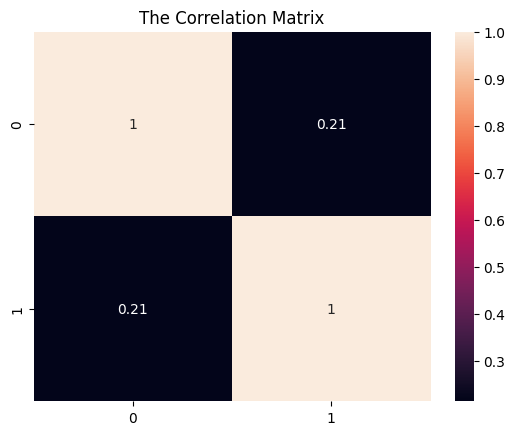

In [3262]:
sns.heatmap(correlation_met, annot= True)
plt.title('The Correlation Matrix')


Text(0.5, 1.0, 'Gender Disturabution')

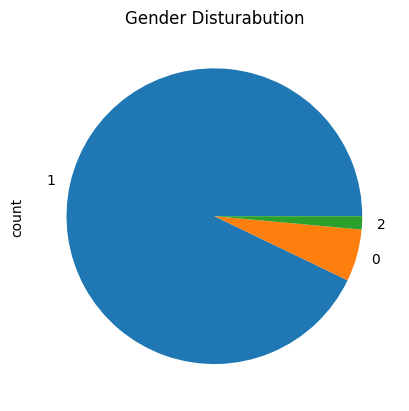

In [3263]:
gender = combine_df['Sex_of_driver'].value_counts()

gender.plot(kind= 'pie')
plt.title('Gender Disturabution')

# 0: Famale, 1: Male, 2: Unkonwn

Text(0.5, 1.0, 'Educational level')

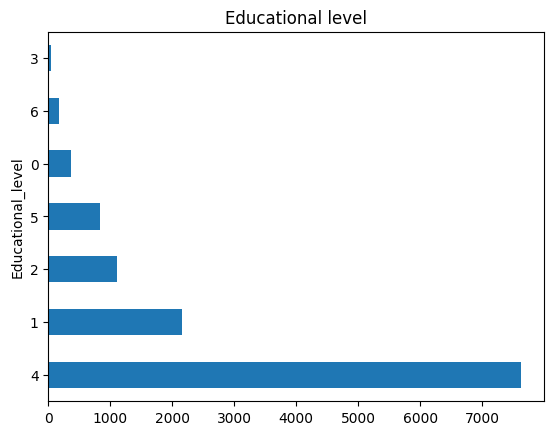

In [3264]:
Educational_level = combine_df['Educational_level'].value_counts()

Educational_level.plot(kind= 'barh')
plt.title('Educational level')

## Feature Selection
- Choose features that you believe will most influence the outcome based on your analysis and the insights from your visualizations. Focus on those that appear most impactful to include in your modeling.

## Train-Test Split
* Divide the dataset into training and testing sets to evaluate the performance of your models.

In [3265]:
combine_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12316 entries, 0 to 12315
Data columns (total 34 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   0                        12316 non-null  float64       
 1   1                        12316 non-null  float64       
 2   Hour                     12316 non-null  int32         
 3   Time                     12316 non-null  datetime64[ns]
 4   Day_of_week              12316 non-null  object        
 5   Age_band_of_driver       12316 non-null  int64         
 6   Sex_of_driver            12316 non-null  int64         
 7   Educational_level        12316 non-null  int64         
 8   Vehicle_driver_relation  12316 non-null  object        
 9   Driving_experience       12316 non-null  object        
 10  Type_of_vehicle          12316 non-null  int64         
 11  Owner_of_vehicle         12316 non-null  object        
 12  Service_year_of_vehicle  12316 n

In [3266]:
num_values = combine_df.select_dtypes(include= ['number'])

In [3267]:
num_values

,0,1,Hour,Age_band_of_driver,Sex_of_driver,Educational_level,Type_of_vehicle,Cause_of_accident,Accident_severity,Hour
0,0.448649,-0.059061,17,0,1,0,0,9,2,17
1,0.448649,-0.059061,17,1,1,4,10,16,2,17
2,0.448649,-0.059061,17,0,1,4,5,0,1,17
3,0.448649,-0.059061,1,0,1,4,10,1,2,1
4,0.448649,-0.059061,1,0,1,4,16,16,2,1
...,...,...,...,...,...,...,...,...,...,...
12311,-0.544264,-0.059061,16,1,1,5,4,10,2,16
12312,-0.544264,-0.059061,18,4,1,1,0,10,2,18
12313,-0.544264,-1.510942,13,2,1,4,1,1,1,13
12314,-0.544264,-0.059061,13,0,0,4,5,5,2,13


In [3268]:
X = num_values[['Hour', 'Age_band_of_driver', 'Sex_of_driver', 'Educational_level', 'Type_of_vehicle', 'Cause_of_accident', 'Accident_severity']]
y = combine_df['Accident_severity']

In [3269]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [3270]:
y_train.dtype

dtype('int64')

## Modeling

Once the data is split into training and testing sets, the next step is to build models to make predictions. Here, we will explore several machine learning algorithms, each with its unique characteristics and suitability for different types of data and problems. You will implement the following models:

### 1. Logistic Regression

### 2. Decision Tree Classifier

### 3. Support Vector Machine (SVM)

### 4. K-Neighbors Classifier

### Implementing the Models
- For each model, use the training data you have prepared to train the model.

#### Logistic Regression

In [3271]:
from sklearn.linear_model import LogisticRegression

LR_model = LogisticRegression(penalty='l2', max_iter=50)

LR_model.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=50)

In [3272]:
y_pred_LR = LR_model.predict(X_test)
y_pred_LR

array([1, 1, 2, ..., 2, 1, 2])

#### Decision Tree Classifier

In [3273]:
from sklearn.tree import DecisionTreeClassifier

DT_model = DecisionTreeClassifier(max_depth= 3, random_state=42)

DT_model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=42)

In [3274]:
y_pred_DT = DT_model.predict(X_test)
y_pred_DT

array([1, 1, 2, ..., 2, 1, 2])

#### Support Vector Machine (SVM)

In [3275]:
from sklearn.svm import SVC

svm_model =  SVC(C= 1, kernel='linear', random_state= 42)

svm_model.fit(X_train, y_train)

SVC(C=1, kernel='linear', random_state=42)

In [3276]:
y_pred_svm = svm_model.predict(X_test)
y_pred_svm

array([1, 1, 2, ..., 2, 1, 2])

#### K-Neighbors Classifier

In [3277]:
from sklearn.neighbors import KNeighborsClassifier

knn_model =  KNeighborsClassifier(n_neighbors= 5, n_jobs= -1, weights= 'uniform')

knn_model.fit(X_train, y_train)

KNeighborsClassifier(n_jobs=-1)

In [3278]:
y_pred_knn = knn_model.predict(X_test)
y_pred_knn

array([2, 2, 2, ..., 2, 2, 2])

## Model Evaluation

After training your models, it's crucial to evaluate their performance to understand their effectiveness and limitations. This section outlines various techniques and metrics to assess the performance of each model you have implemented.

### Evaluation Techniques
1. **Confusion Matrix**

2. **Accuracy**

3. **Precision and Recall**

4. **F1 Score**

5. **ROC Curve and AUC**

### Implementing Evaluation
- Calculate the metrics listed above using your test data.

In [3279]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, roc_curve, roc_auc_score

accuracy = accuracy_score(y_test, y_pred_DT)
print("Accuracy: ", accuracy)

cm = confusion_matrix(y_test, y_pred_DT)
print("confusion_matrix: ", cm)

precision_score = precision_score(y_test, y_pred_DT, average= 'macro')
print("precision_score: ", precision_score)

recall_score = recall_score(y_test, y_pred_DT, average= 'macro')
print("recall_score: ", recall_score)

f1_score = f1_score(y_test, y_pred_DT, average= 'macro')
print("f1_score: ", f1_score)


Accuracy:  1.0
confusion_matrix:  [[  27    0    0]
 [   0  338    0]
 [   0    0 2099]]
precision_score:  1.0
recall_score:  1.0
f1_score:  1.0


In [3280]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, roc_curve, roc_auc_score

accuracy = accuracy_score(y_test, y_pred_LR)
print("Accuracy: ", accuracy)

cm = confusion_matrix(y_test, y_pred_LR)
print("confusion_matrix: ", cm)

precision_score = precision_score(y_test, y_pred_LR, average= 'weighted')
print("precision_score: ", precision_score)

recall_score = recall_score(y_test, y_pred_LR, average= 'macro')
print("recall_score: ", recall_score)

f1_score = f1_score(y_test, y_pred_LR, average= 'macro')
print("f1_score: ", f1_score)


Accuracy:  0.9849837662337663
confusion_matrix:  [[   9   18    0]
 [   5  321   12]
 [   0    2 2097]]
precision_score:  0.9831939914531612
recall_score:  0.7606948802206617
f1_score:  0.793735164731153


In [3281]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, roc_curve, roc_auc_score

accuracy = accuracy_score(y_test, y_pred_svm)
print("Accuracy: ", accuracy)

cm = confusion_matrix(y_test, y_pred_svm)
print("confusion_matrix: ", cm)

precision_score = precision_score(y_test, y_pred_svm, average= 'macro')
print("precision_score: ", precision_score)

recall_score = recall_score(y_test, y_pred_svm, average= 'macro')
print("recall_score: ", recall_score)

f1_score = f1_score(y_test, y_pred_svm, average= 'macro')
print("f1_score: ", f1_score)


Accuracy:  1.0
confusion_matrix:  [[  27    0    0]
 [   0  338    0]
 [   0    0 2099]]
precision_score:  1.0
recall_score:  1.0
f1_score:  1.0


In [3282]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, roc_curve, roc_auc_score

accuracy = accuracy_score(y_test, y_pred_knn)
print("Accuracy: ", accuracy)

cn = confusion_matrix(y_test, y_pred_knn)
print("confusion_matrix: ", cm)

precision_score = precision_score(y_test, y_pred_knn, average= 'macro')
print("precision_score: ", precision_score)

recall_score = recall_score(y_test, y_pred_knn, average= 'macro')
print("recall_score: ", recall_score)

f1_score = f1_score(y_test, y_pred_knn, average= 'macro')
print("f1_score: ", f1_score)


Accuracy:  0.8632305194805194
confusion_matrix:  [[  27    0    0]
 [   0  338    0]
 [   0    0 2099]]
precision_score:  0.6588785971578989
recall_score:  0.3780979438740766
f1_score:  0.39010006256217117


## Project Questions:

### Comparative Analysis

- **Compare Metrics**: Examine the performance metrics (such as accuracy, precision, and recall) of each model. Document your observations on which model performs best for your dataset and the problem you're addressing.
- **Evaluate Trade-offs**: Discuss the trade-offs you encountered when choosing between models. Consider factors like computational efficiency, ease of implementation, and model interpretability.
- **Justify Your Choice**: After comparing and evaluating, explain why you believe one model is the best choice. Provide a clear rationale based on the performance metrics and trade-offs discussed.
- **Feature Importance**: Identify and discuss the most important features for the best-performing model. How do these features impact the predictions? Use the visualizations you have created to justify your answer if necessary.
- **Model Limitations**: Discuss any limitations you encountered with the models you used. Are there any aspects of the data or the problem that these models do not handle well?
- **Future Improvements**: Suggest potential improvements or further steps you could take to enhance model performance. This could include trying different algorithms, feature engineering techniques, or tuning hyperparameters.

### Answer Here:

Q1 : DT and SVM classifires have the higher accyracy than other mthods

Q2: DT and SVM classifires are work well with the dataset, and they easy to use

Q3: DT is good becuse the data was a lot and has many fetures, so we use DT when we have a lot of data

Q4: The affect of pre-proceesing like Scaler and lable encoder are give the model more insghit and they affect on the performace in good way, so I take the categories fetures bucuse I think they important for the target class

Q5: KNN has the lowest value and I think becuse it need more hypreparmetrs adgisments, but 86% it considered as good performace still

Q6: I think if we apply grid search to search about the best hyperparametrs to use them in the model, the performance will be more good
